# 计算物理第一次作业

## Bessel 方程

$$
x^2 \frac{d^2 y}{d x^2} + x \frac{dx}{dy} + (x^2 - n^2) y = 0
$$

这里，$n$ 被称为其对应贝塞尔函数的阶数。实际应用中最常见的情形为 $n$ 是整数，对应解称为 $n$ 阶贝塞尔函数 $J_n(x)$

贝塞尔函数 $J_n(x)$ 之间有如下两个关系

$$
J_{n+1}(x) - \frac{2n}{x} J_n(x) + J_{n-1}(x) = 0 \tag{1}
$$

$$
\left[J_0(x)\right]^2 + 2 \sum_{n=1}^{\infty} [J_n(x)]^2 = 1 \tag{2}
$$

可以预见的是

$$
\left|J_n(x)\right|_{n \to \infty} \to 0
$$

考虑到数值计算的精度，$n$ 一定大之后，都小于数值可以允许的精度

$$
\left|J_n(x)\right|_{n \ge M} \le eps
$$

所以我们可以做一个假设

$$
J_M(x) = 0, \quad J_{M-1} = 1
$$

然后根据递推关系，递推地算出其他的 $J_n(x)$ 相对的大小，由于是齐次的线性的关系式，最后根据第二个关系式，做一个归一化，就可以得到需要的答案。

## 导入前置的包并设置基本的参数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

epsi = 1e-9

In [2]:
def BesselJ(x: float, m, M) -> np.ndarray:
    """计算 Bessel 函数 J_n(x)

    Args:
        x (float): 自变量
        m (int): 最高阶数
        M (int): 返回的阶数

    Returns:
        np.ndarray: J_n(x) 的数组

    Example:
        >>> x = np.linspace(0, 20, 100)
        >>> Jn = BesselJ(x, 10, 10)
        >>> plt.plot(x, Jn.T)
        >>> plt.show()
    """
    Jn = np.zeros(m+1)
    Jn[m] = 0
    Jn[m-1] = 1
    for n in range(m-2, -1, -1):
        Jn[n] = 2*(n+1)/2 * Jn[n+1] - Jn[n+2]
        # 放缩
        if Jn[n] > 1/epsi:
            Jn *= epsi
    Jn /= (Jn[0]**2 + 2*np.sum(Jn[1:]**2))**(1/2)
    return Jn[:M+1]


def BesselJ_without_rescale(x: float, m, M) -> np.ndarray:
    """计算 Bessel 函数 J_n(x), 但不中途放缩

    Args:
        x (float): 自变量
        m (int): 最高阶数
        M (int): 返回的阶数

    Returns:
        np.ndarray: J_n(x) 的数组

    Example:
        >>> x = np.linspace(0, 20, 100)
        >>> Jn = BesselJ_without_rescale(x, 10, 10)
        >>> plt.plot(x, Jn.T)
        >>> plt.show()
    """
    Jn = np.zeros(m+1)
    Jn[m] = 0
    Jn[m-1] = 1
    for n in range(m-2, -1, -1):
        Jn[n] = 2*(n+1)/2 * Jn[n+1] - Jn[n+2]
        # 不放缩
        # if Jn[n] > 1/epsi:
        #     Jn *= epsi
    Jn /= (Jn[0]**2 + 2*np.sum(Jn[1:]**2))**(1/2)
    return Jn[:M+1]

Text(0, 0.5, '$J_n(x=1)$')

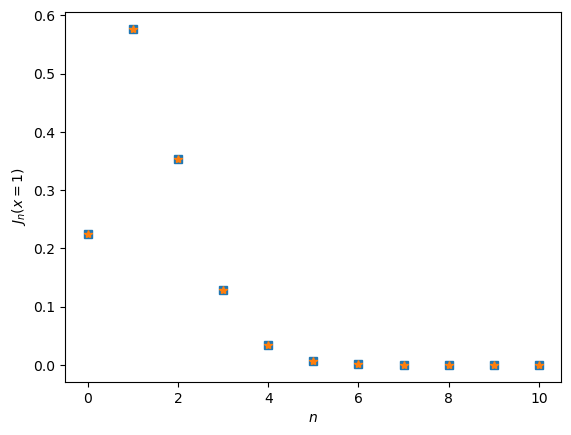

In [3]:
J1 = BesselJ(x=1, m=20, M=10)
J2 = BesselJ_without_rescale(x=1, m=20, M=10)

plt.plot(J1, 's')
plt.plot(J2, '*')
plt.xlabel(f'$n$')
plt.ylabel(f'$J_n(x=1)$')

In [4]:
J1 = BesselJ(x=1, m=100, M=10)
J1[1]

np.float64(0.5767248077568734)

Text(0, 0.5, '$J_n$')

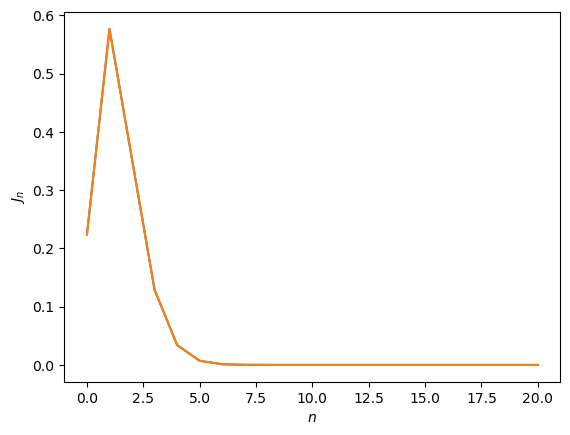

In [5]:
J1 = BesselJ(x=1, m=100, M=20)
J10 = BesselJ(x=10, m=100, M=20)

plt.plot(J1)
plt.plot(J10)
plt.xlabel(f'$n$')
plt.ylabel(f'$J_n$')

## Bisection 二分法

$$
f(a) * f(b) < 0, \quad a < b
$$

可以用二分法计算函数 $f(x)$ 在 $\in[a,b]$ 之间的零点

每次在中间取点计算函数值，与两端的函数值比较，零点应该在函数值异号的两点之间。

### fixed point

不动点

$$
g(p) = p
$$

> 寻找不动点的问题可以转化为了寻找零点的问题。

---

$$
g \in [a, b], \quad g(x) \in [a, b] \tag{1}
$$

则至少存在一个不动点

$$
|g^{\prime}(x)| \le k \tag{2}
$$

则只存在一个不动点。

一开始选取一个点 $P_0$，然后迭代

$$
P_n = g(P_{n-1})
$$

$$
P = \lim_{n \to \infty} P_n = \lim_{n \to \infty} g(P_{n-1}) = g(\lim_{n \to \infty} P_{n-1}) = g(P)
$$

就得到了不动点 $P$

